# Exercise 11.1: Irises II

We continue working with [the iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) in this exercise. 

**a)** Download the `iris.csv` file and load it in Python (you can use `pandas.read_csv` function).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('iris.csv')

**b)** Calculate mean, standard deviation, maximal and minimal values of the dataset columns. 

In [2]:
df.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**c)** Plot histograms for column `sepal_length` and for column `petal_length`.

array([[<AxesSubplot:title={'center':'sepal_length'}>]], dtype=object)

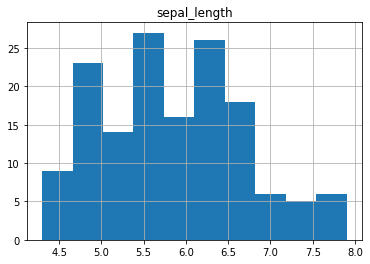

In [3]:
df.hist(column=('sepal_length'))

# alternatively, you can use matplotlib.pyplot.hist

array([[<AxesSubplot:title={'center':'petal_length'}>]], dtype=object)

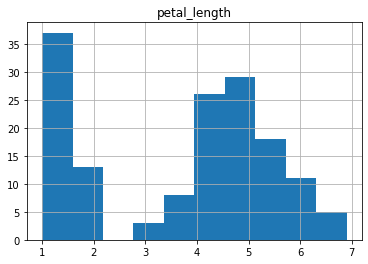

In [4]:
df.hist(column=('petal_length'))

**d)** Calculate the standart deviation of `sepal_length` for the irises of *virginica* species.

In [5]:
df[df['name']=='virginica']['sepal_length'].std()

0.635879593274432

**e)** Generate a scatter plot of the dataset (use `pandas.DataFrame.plot.scatter`) with `sepal_length` in the x-axis and `petal_length` in the y-axis. You clearly see two different populations in this plot. Calculate the mean petal length value for the larger of the two populations.

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

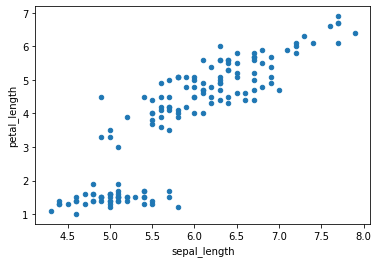

In [6]:
df.plot.scatter('sepal_length', 'petal_length')

# alternatively, you can use matplotlib.pyplot.plot(data['sepal_length'],data['petal_length'], 'o')

In [7]:
df[df['petal_length']>2.5]['petal_length'].mean()

# mean of the upper group of points in the graph
# you can see that petal_length > 2.5 for this group

4.906000000000001

**f)** Compare the values of sepal width for irises of species *versicolor* und *virginica* using a boxplot (`df.groupby(...).boxplot`).  

versicolor         AxesSubplot(0.1,0.15;0.363636x0.75)
virginica     AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

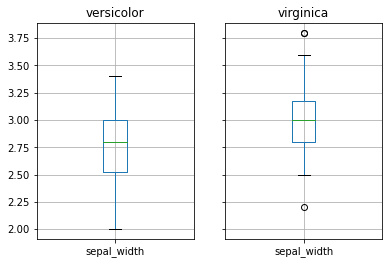

In [8]:
groupby_name = df[df['name']!= 'setosa'].groupby('name')
# we exclude the setosa irises and then group by name 

groupby_name.boxplot(column = ['sepal_width'])

**g)** Test the hypothesis that both species have the same sepal width on average (use `scipy.stats.ttest_ind`).

In [9]:
sepal_width_ver, sepal_width_vir = [g[1]['sepal_width'] for g in groupby_name]
# we extract the sepal_width values for the two groups separately

In [10]:
from scipy import stats

# two-sample test for equality of means
stats.ttest_ind(sepal_width_ver, sepal_width_vir)

# small p-value (e.g. <0.01) indicates that the means are very unlikely to be equal 

Ttest_indResult(statistic=-3.2057607502218186, pvalue=0.0018191004238894803)

**h)** Perform a 1-sample test to check how likely it is that the *virginica* sample has mean value 2.77 (i.e. equal to the mean value of the *versicolor* sample).

In [11]:
# one-sample test for equality of mean to a given value 
stats.ttest_1samp(sepal_width_vir, sepal_width_ver.mean())

# small p-value (e.g. <0.01) indicates that the mean is unlikely to have the given value

Ttest_1sampResult(statistic=4.472908126404603, pvalue=4.587215749485262e-05)